In [146]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
from IPython.core.interactiveshell import InteractiveShell

# to make jupyter print all outputs, not just the last one
InteractiveShell.ast_node_interactivity = "all" 

# to pretty print pandas df and be able to copy them over (e.g. to ppt slides)
from IPython.core.display import HTML 

# For plotting
from plotnine import *

In [148]:
import csv

deleted_rows_count = 0  # Variable to keep track of the number of deleted rows

# Open the CSV file with 'errors' set to 'ignore' to handle decoding issues
with open("car_prices.csv", 'r', errors='ignore') as file:
    
    # Use csv.reader to read the CSV file
    csv_reader = csv.reader(file)
    
    # Initialise lists to store valid lines and deleted lines
    valid_lines = []
    deleted_lines = []
    
    # Iterate through each line in the CSV file
    for line in csv_reader:
        if len(line) == 16:
            # If the line has 16 fields, add it to the list of valid lines
            valid_lines.append(line)
        else:
            # If the line has a different number of fields, add it to the list of deleted lines
            deleted_lines.append(line)
            deleted_rows_count += 1  # Increment the count of deleted rows

# Create a DataFrame from the valid lines
prices_df = pd.DataFrame(valid_lines[1:], columns=valid_lines[0])

# Print the number of deleted rows
print(f"Number of deleted rows: {deleted_rows_count}")

Number of deleted rows: 23


In [149]:
print(f"There are {prices_df.shape[0]} rows and {prices_df.shape[1]} columns in the dataset")

There are 558808 rows and 16 columns in the dataset


In [150]:
# Check top of file
prices_df.head()
# Check bottom of file
prices_df.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558803,2015,Kia,K900,Luxury,Sedan,,knalw4d4xf6019304,in,4.5,18255,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558804,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5,54393,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558805,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558806,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558807,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,3.4,15008,gray,gray,"ford motor credit company,llc pd",29600,26700,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


In [151]:
# Adding 'id' as a column header
prices_df.insert(0, 'id', prices_df.index)

# Display the modified DataFrame
print(prices_df)

            id  year    make                model         trim       body  \
0            0  2015     Kia              Sorento           LX        SUV   
1            1  2015     Kia              Sorento           LX        SUV   
2            2  2014     BMW             3 Series   328i SULEV      Sedan   
3            3  2015   Volvo                  S60           T5      Sedan   
4            4  2014     BMW  6 Series Gran Coupe         650i      Sedan   
...        ...   ...     ...                  ...          ...        ...   
558803  558803  2015     Kia                 K900       Luxury      Sedan   
558804  558804  2012     Ram                 2500  Power Wagon   Crew Cab   
558805  558805  2012     BMW                   X5    xDrive35d        SUV   
558806  558806  2015  Nissan               Altima        2.5 S      sedan   
558807  558807  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state condition odometer   color  \


In [152]:
# Drop duplicates
prices_df.drop_duplicates(subset=['id']).shape[0] == prices_df.shape[0]

True

In [153]:
# Set the 'id' column as the index of the DataFrame
prices_df = prices_df.set_index("id")
prices_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
id,,,,,,,,,,,,,,,,
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [154]:
# Replace empty strings with NaN for all columns
for col in prices_df.columns:
    prices_df[col] = prices_df[col].replace('', np.nan)

In [155]:
# Check in which columns nans are
nan_columns = prices_df.isna().any()
print(nan_columns)

year            False
make             True
model            True
trim             True
body             True
transmission     True
vin             False
state           False
condition        True
odometer         True
color            True
interior         True
seller          False
mmr             False
sellingprice    False
saledate        False
dtype: bool


In [156]:
# Count the number of rows with null values
n_null_rows = prices_df.loc[lambda x: x.isnull().any(axis=1)].shape
print(f"There are {n_null_rows[0]} rows with null values in this dataset")

# Identify columns with null values
columns_with_nulls = prices_df.columns[prices_df.isnull().any()].tolist()
print(f"Columns with null values: {columns_with_nulls}")

There are 86475 rows with null values in this dataset
Columns with null values: ['make', 'model', 'trim', 'body', 'transmission', 'condition', 'odometer', 'color', 'interior']


In [157]:
# Replace empty strings in 'odometer' with NaN
prices_df['odometer'] = prices_df['odometer'].replace('', np.nan).astype(float)

# Imputation using year, make, and model
prices_df['odometer'] = prices_df.groupby(['year', 'make', 'model'])['odometer'].transform(lambda x: x.fillna(x.median()))

# If the above step leaves any NaNs (perhaps because the median could not be calculated for a group), impute using year and make
prices_df['odometer'] = prices_df.groupby(['year', 'make'])['odometer'].transform(lambda x: x.fillna(x.median()))

# If there are still NaN values, fill them with the average of the 'odometer' column
average_odometer = prices_df['odometer'].mean()
prices_df['odometer'] = prices_df['odometer'].fillna(average_odometer)

# Count the number of rows with null values after all imputation steps
n_null_rows = prices_df[prices_df['odometer'].isnull()].shape[0]
print(f"There are {n_null_rows} rows with null values in the 'odometer' column after all imputation steps.")

There are 0 rows with null values in the 'odometer' column after all imputation steps.


In [158]:
# Filter out the blank entries and count the occurrences of each transmission type
transmission_counts = prices_df[prices_df['transmission'].str.strip() != 'nan']['transmission'].value_counts(normalize=True)
# Calculate the probabilities
probabilities = transmission_counts.values
# Replace blank spaces with NaN for easier handling
#prices_df['transmission'] = prices_df['transmission'].replace('', np.nan)
# Find indices where transmission is NaN
nan_indices = prices_df[prices_df['transmission'].isna()].index
# Generate random choices based on the distribution of 'automatic' and 'manual'
random_transmissions = np.random.choice(transmission_counts.index, size=len(nan_indices), p=probabilities)
# Assign these random values to NaN entries
prices_df.loc[nan_indices, 'transmission'] = random_transmissions


# Filter out the blank entries and count the occurrences of each color
color_counts = prices_df[prices_df['color'].str.strip() != 'nan']['color'].value_counts(normalize=True)
# Calculate the probabilities
probabilities = color_counts.values
# Replace blank spaces with NaN for easier handling
#prices_df['color'] = prices_df['color'].replace('', np.nan)
#prices_df['color'] = prices_df['color'].replace('—', np.nan)
# Find indices where color is NaN
nan_indices = prices_df[prices_df['color'].isna()].index
# Generate random choices based on the distribution of colors
random_colors = np.random.choice(color_counts.index, size=len(nan_indices), p=probabilities)
# Assign these random values to NaN entries
prices_df.loc[nan_indices, 'color'] = random_colors

In [159]:
# Ensure numerical columns are of type float or int
for col in numerical_columns:
    # Convert to float, coercing errors which will turn non-numeric strings into NaN
    prices_df[col] = pd.to_numeric(prices_df[col], errors='coerce')

# Now, impute numerical columns with the mean
for col in numerical_columns:
    average_value = prices_df[col].mean()
    prices_df[col] = prices_df[col].fillna(average_value)

# Handle categorical columns
for col in categorical_columns:
    # Ensure there are no numeric types in categorical columns, convert everything to string
    prices_df[col] = prices_df[col].astype(str)
    
    # Replace 'nan' strings that appeared from conversion with actual NaN for proper mode calculation
    prices_df[col].replace('nan', np.nan, inplace=True)

    most_frequent_value = prices_df[col].mode(dropna=True)[0]  # Use dropna to ignore NaN in mode calculation
    prices_df[col] = prices_df[col].fillna(most_frequent_value)

# Count the number of rows with null values after all imputation steps
n_null_rows_after = prices_df.isnull().sum().sum()  # This counts all NaNs across the entire DataFrame
print(f"There are {n_null_rows_after} rows with null values in the DataFrame after all imputation steps.")


There are 0 rows with null values in the DataFrame after all imputation steps.


In [160]:
# Convert columns to integer
columns_to_int = ['year', 'mmr', 'sellingprice']
for col in columns_to_int:
    # Drop rows with NaN values in the specific column
    prices_df = prices_df.dropna(subset=[col])
    prices_df[col] = prices_df[col].astype(int)

# Convert columns to float
columns_to_float = ['condition', 'odometer']
for col in columns_to_float:
    prices_df[col] = prices_df[col].astype(float)


In [161]:
prices_df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

In [162]:
prices_df.describe()

,year,condition,odometer,mmr,sellingprice
count,558808.000000,558808.000000,558808.000000,558808.000000,558808.000000
mean,2010.038686,3.424511,67537.550290,13769.321171,13611.260463
std,3.966820,0.939366,52423.333705,9679.899269,9749.681601
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28520.000000,7100.000000,6900.000000
50%,2012.000000,3.500000,52644.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,96954.500000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [163]:
prices_df['transmission'].unique()

array(['automatic', 'manual'], dtype=object)

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'odometer'}>,
        <Axes: title={'center': 'mmr'}>],
       [<Axes: title={'center': 'sellingprice'}>, <Axes: >]], dtype=object)

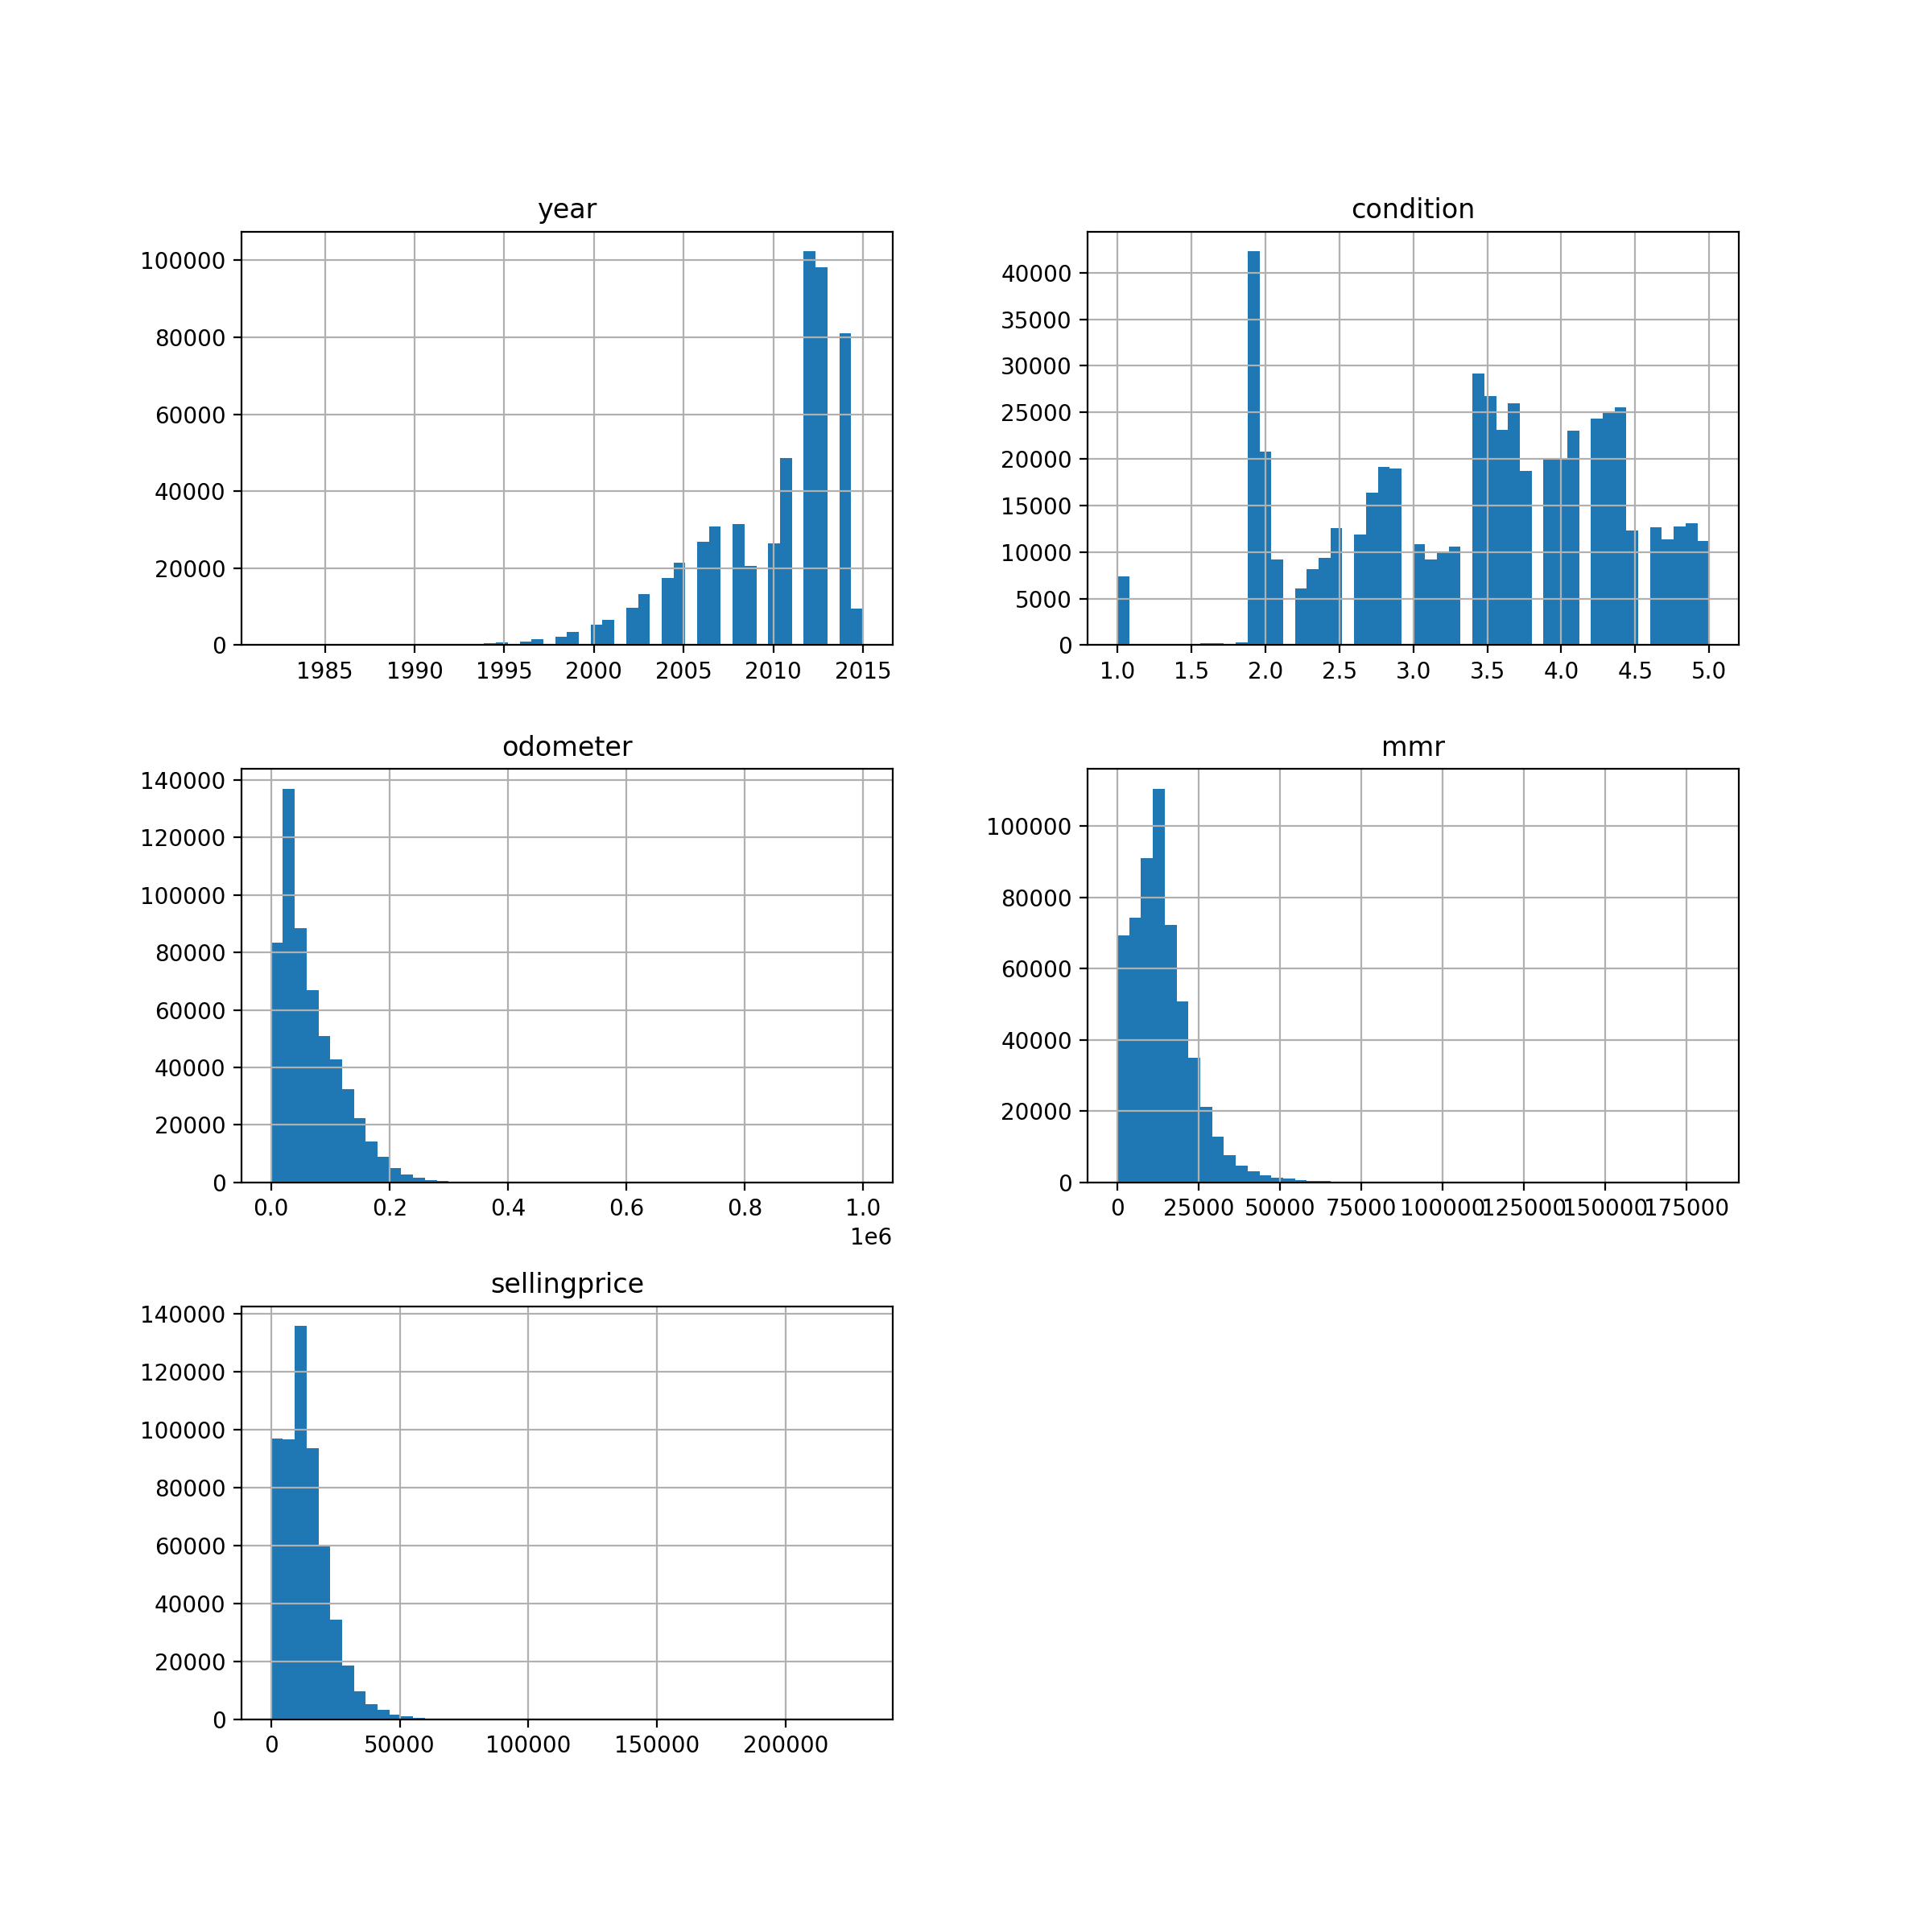

In [164]:
# Histogram
prices_df.hist(bins=50, figsize=(12,12))
plt.show()

In [165]:
(
    prices_df.groupby('transmission')
    .size()
    .reset_index(name='N')
    .assign(total = lambda x: x.N.sum())
    .assign(p = lambda x: x.N / x.total * 100)
)

,transmission,N,total,p
0,automatic,538999,558808,96.455133
1,manual,19809,558808,3.544867


In [166]:
def generate_freq_table(df, variable = ['transmission', 'color']):
    dfs = []
    for i in variable:
        df_count = (
            df.groupby(i, observed=False)
            .size()
            .reset_index(name='N')
            .assign(var = i)
            .rename(columns={i: 'category'})
        )
        dfs.append(df_count)
        res = pd.concat(dfs)
        res['category'] = res['category'].astype(str)
    return res
generate_freq_table(prices_df, ['transmission', 'color'])

,category,N,var
0,automatic,538999,transmission
1,manual,19809,transmission
0,beige,9233,color
1,black,111117,color
2,blue,51205,color
3,brown,6724,color
4,burgundy,8988,color
5,charcoal,480,color
6,gold,11352,color
7,gray,82971,color


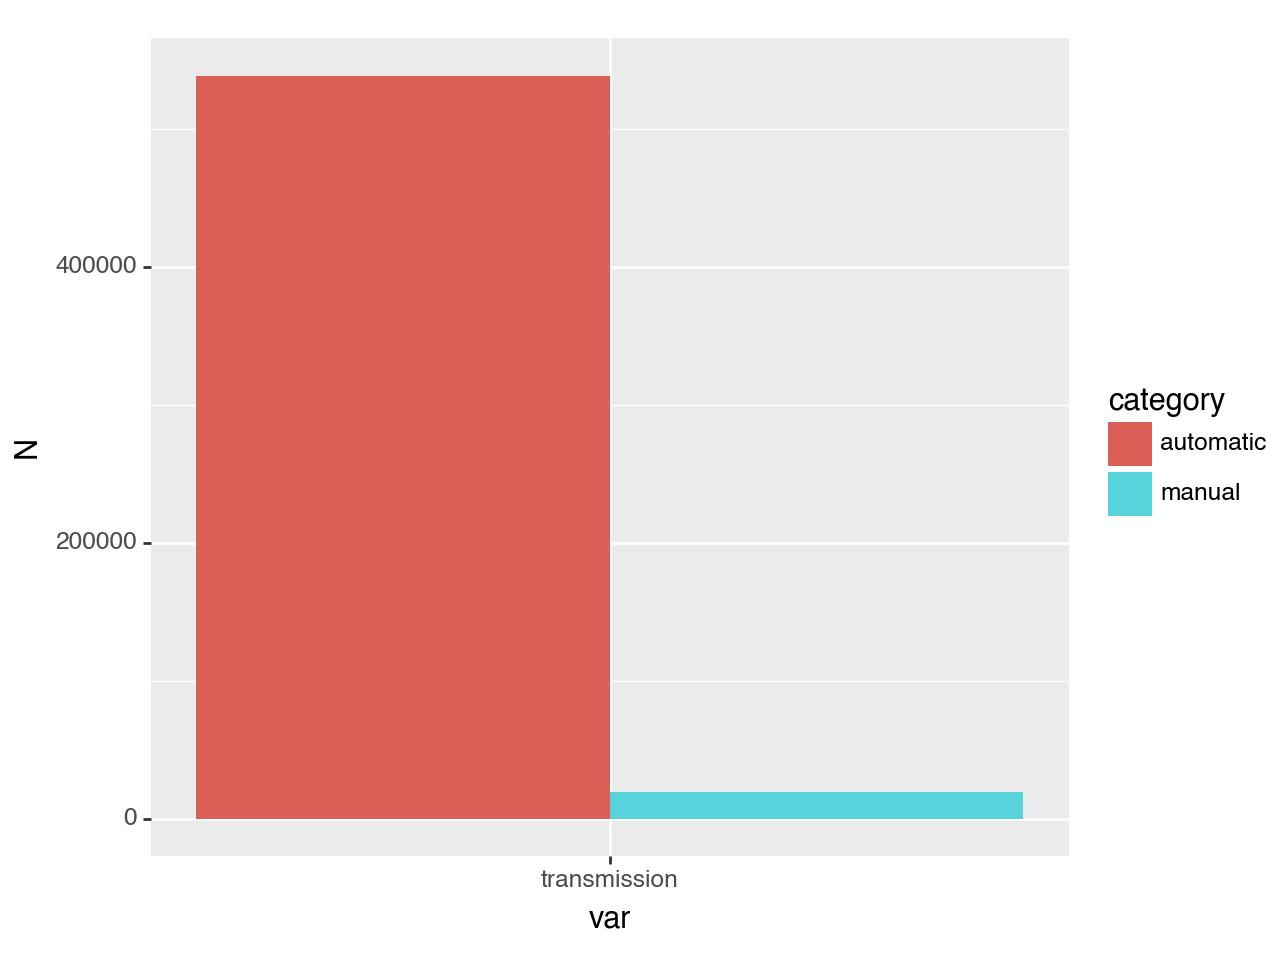

<Figure Size: (640 x 480)>

In [167]:
def generate_freq_plot(freq_table):
    return (
        ggplot(freq_table, aes(x='var', y='N', fill='category')) +
        geom_col(stat='identity', position='dodge')
    )
generate_freq_plot(generate_freq_table((prices_df), [ 'transmission']))

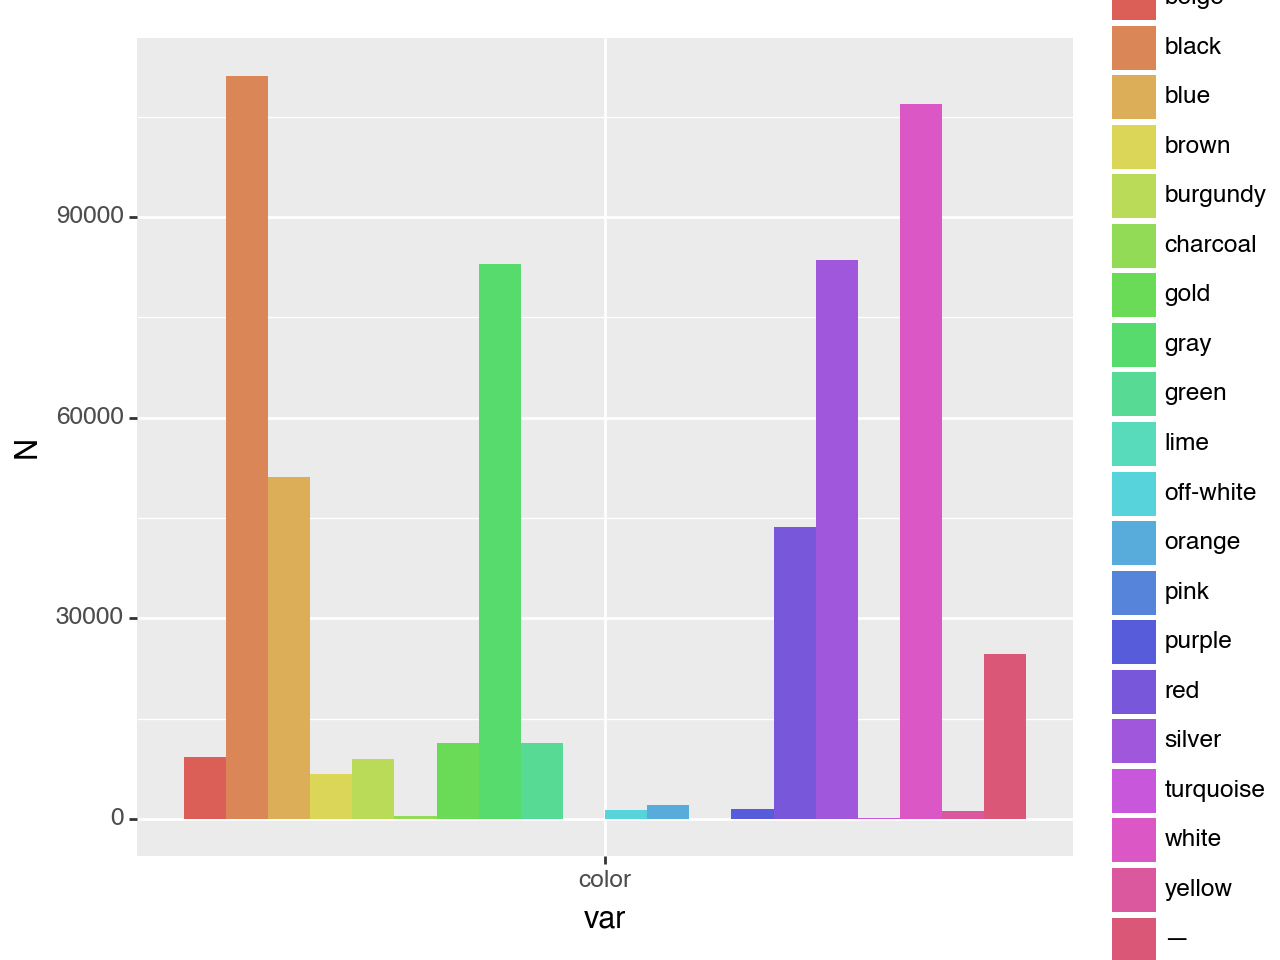

<Figure Size: (640 x 480)>

In [168]:
def generate_freq_plot(freq_table):
    return (
        ggplot(freq_table, aes(x='var', y='N', fill='category')) +
        geom_col(stat='identity', position='dodge')
    )
generate_freq_plot(generate_freq_table((prices_df), [ 'color']))

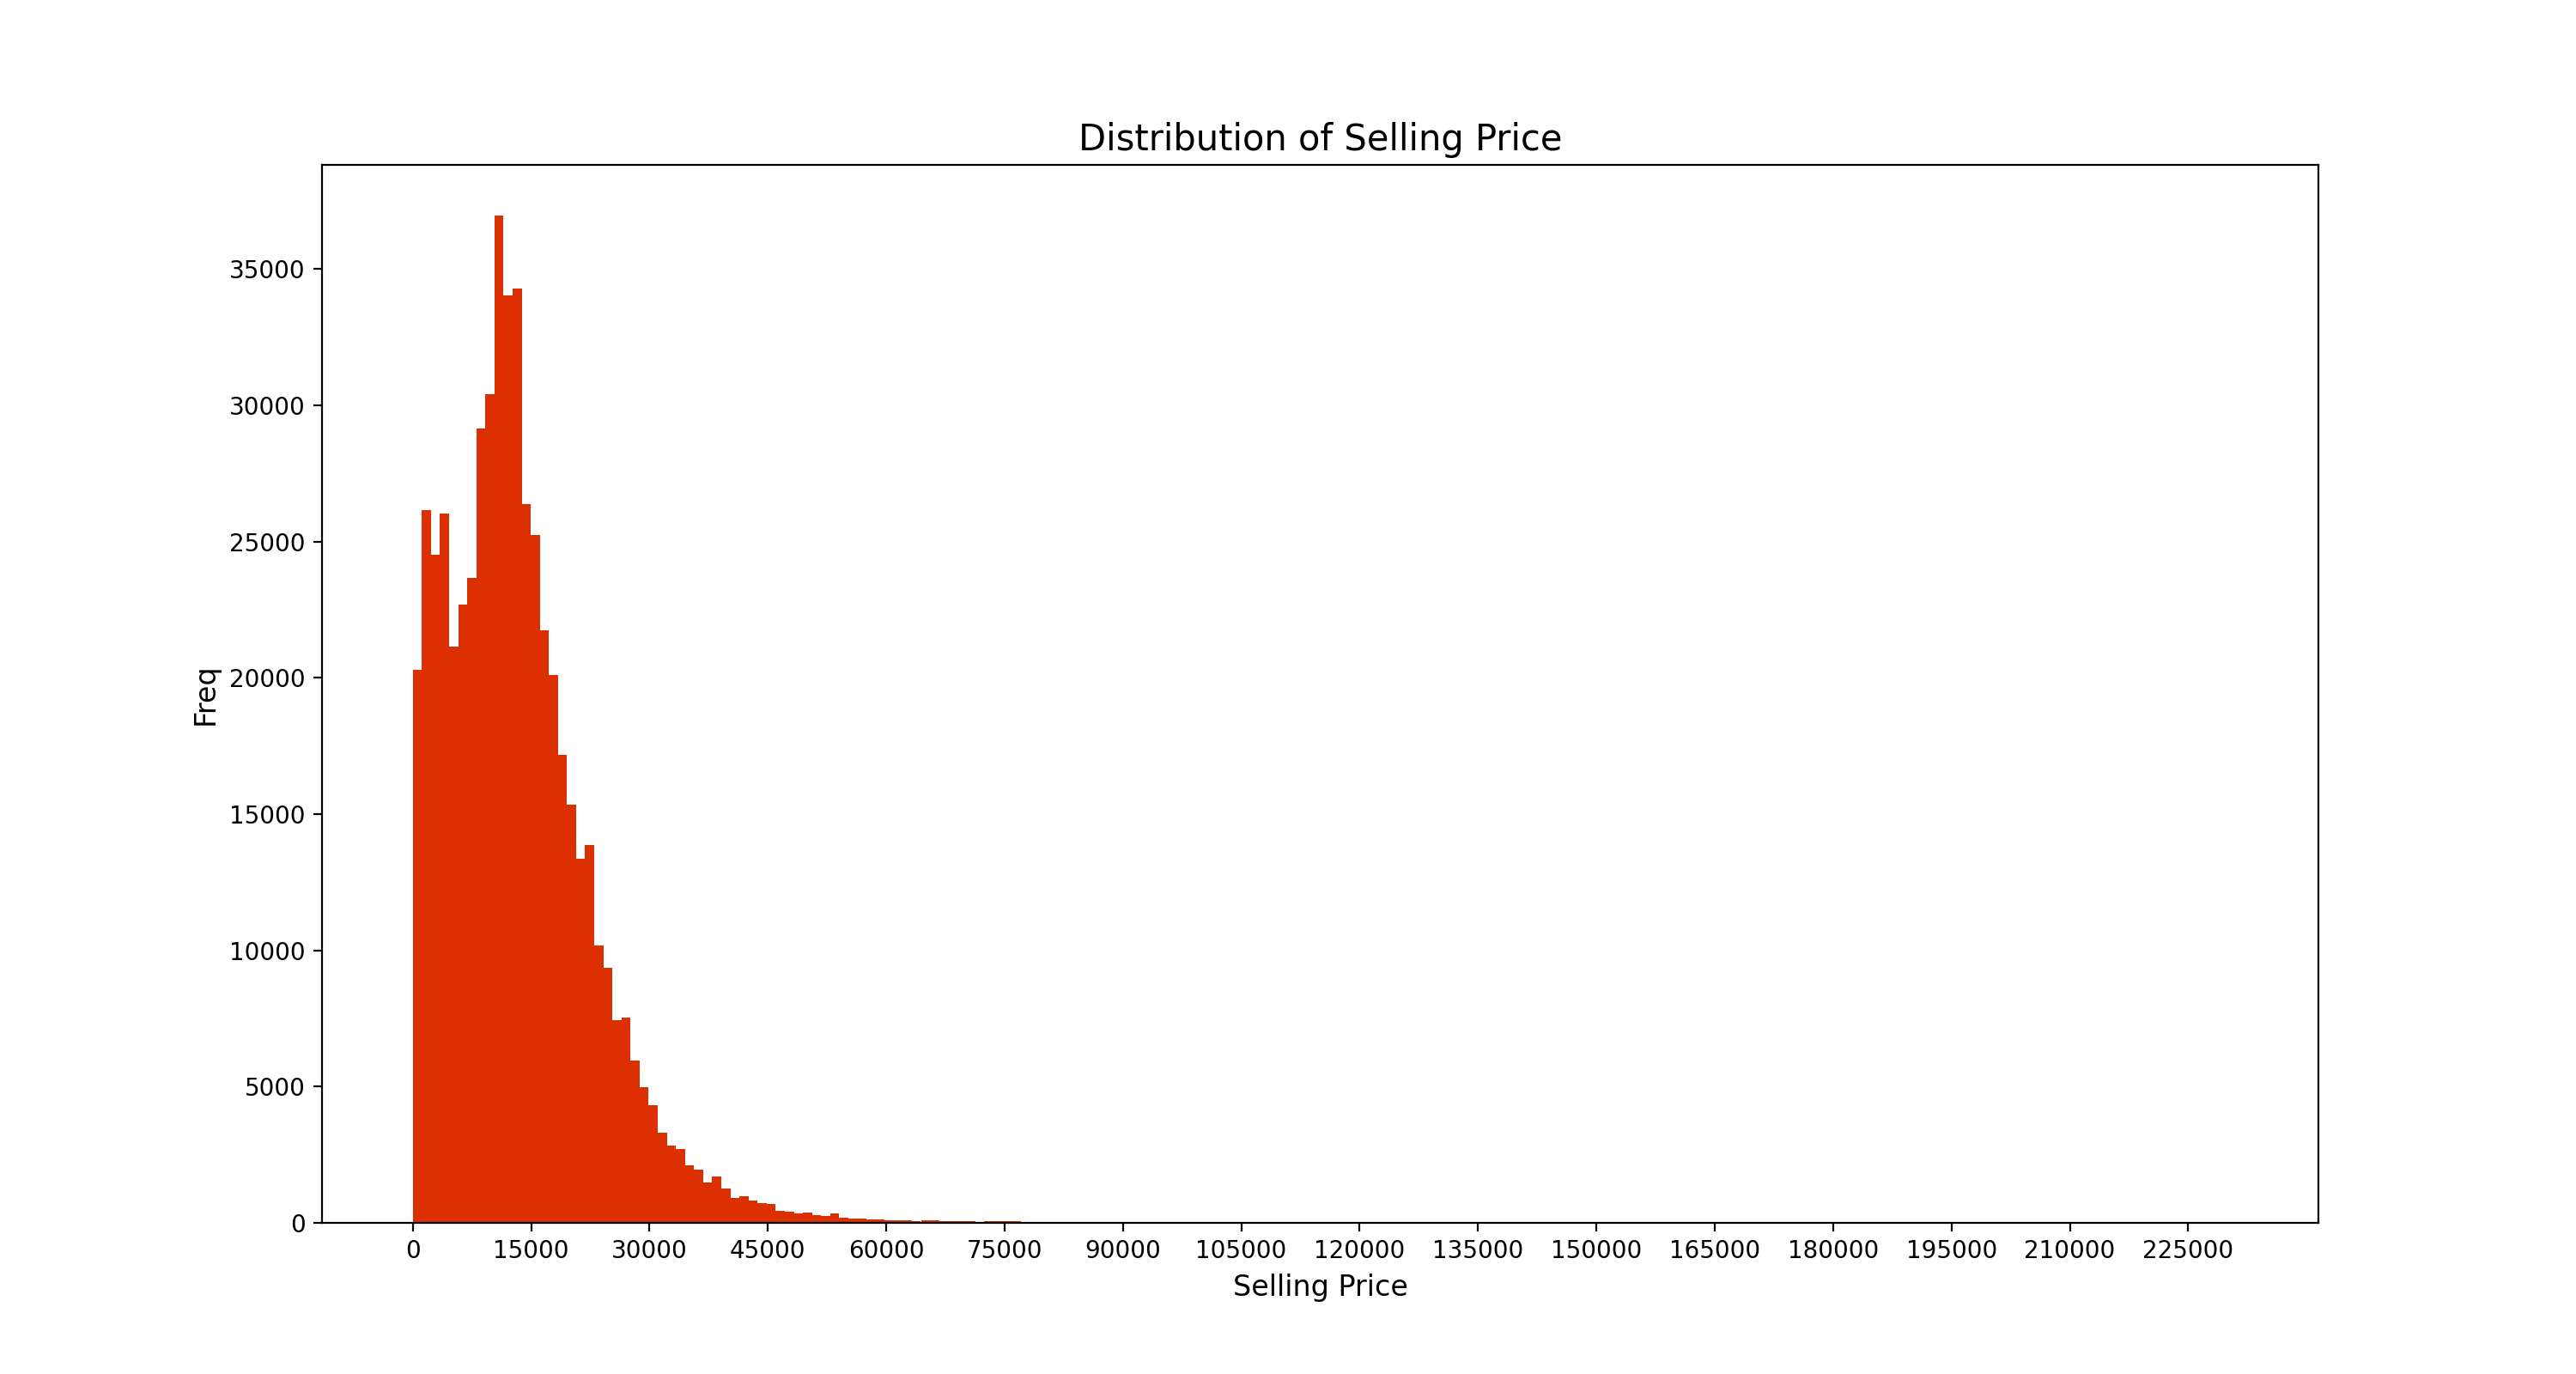

In [169]:
plt.figure(figsize=(15,8))
plt.hist(prices_df['sellingprice'],bins=200,color='#dc2f02')
plt.title('Distribution of Selling Price',fontsize=15)
plt.xticks(np.arange(0,prices_df['sellingprice'].max(),15000))
plt.xlabel('Selling Price',fontsize=12)
plt.ylabel('Freq',fontsize=12)
plt.show(); # semi colon to show plot instead of numbers

In [170]:
prices_df['sellingprice'].describe()

count    558808.000000
mean      13611.260463
std        9749.681601
min           1.000000
25%        6900.000000
50%       12100.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64

In [171]:
prices_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
id,,,,,,,,,,,,,,,,
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558803,2015,Kia,K900,Luxury,Sedan,automatic,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558804,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558805,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)


In [172]:
# Convert to ordinal numbers
prices_df['make_ordinal'] = pd.factorize(prices_df['make'])[0]
prices_df['model_ordinal'] = pd.factorize(prices_df['model'])[0]
prices_df['trim_ordinal'] = pd.factorize(prices_df['trim'])[0]
prices_df['body_ordinal'] = pd.factorize(prices_df['body'])[0]
prices_df['transmission_ordinal'] = pd.factorize(prices_df['transmission'])[0]
prices_df['state_ordinal'] = pd.factorize(prices_df['state'])[0]
prices_df['color_ordinal'] = pd.factorize(prices_df['color'])[0]
prices_df['interior_ordinal'] = pd.factorize(prices_df['interior'])[0]
prices_df['seller_ordinal'] = pd.factorize(prices_df['seller'])[0]

<Figure size 1200x900 with 0 Axes>

<Axes: >

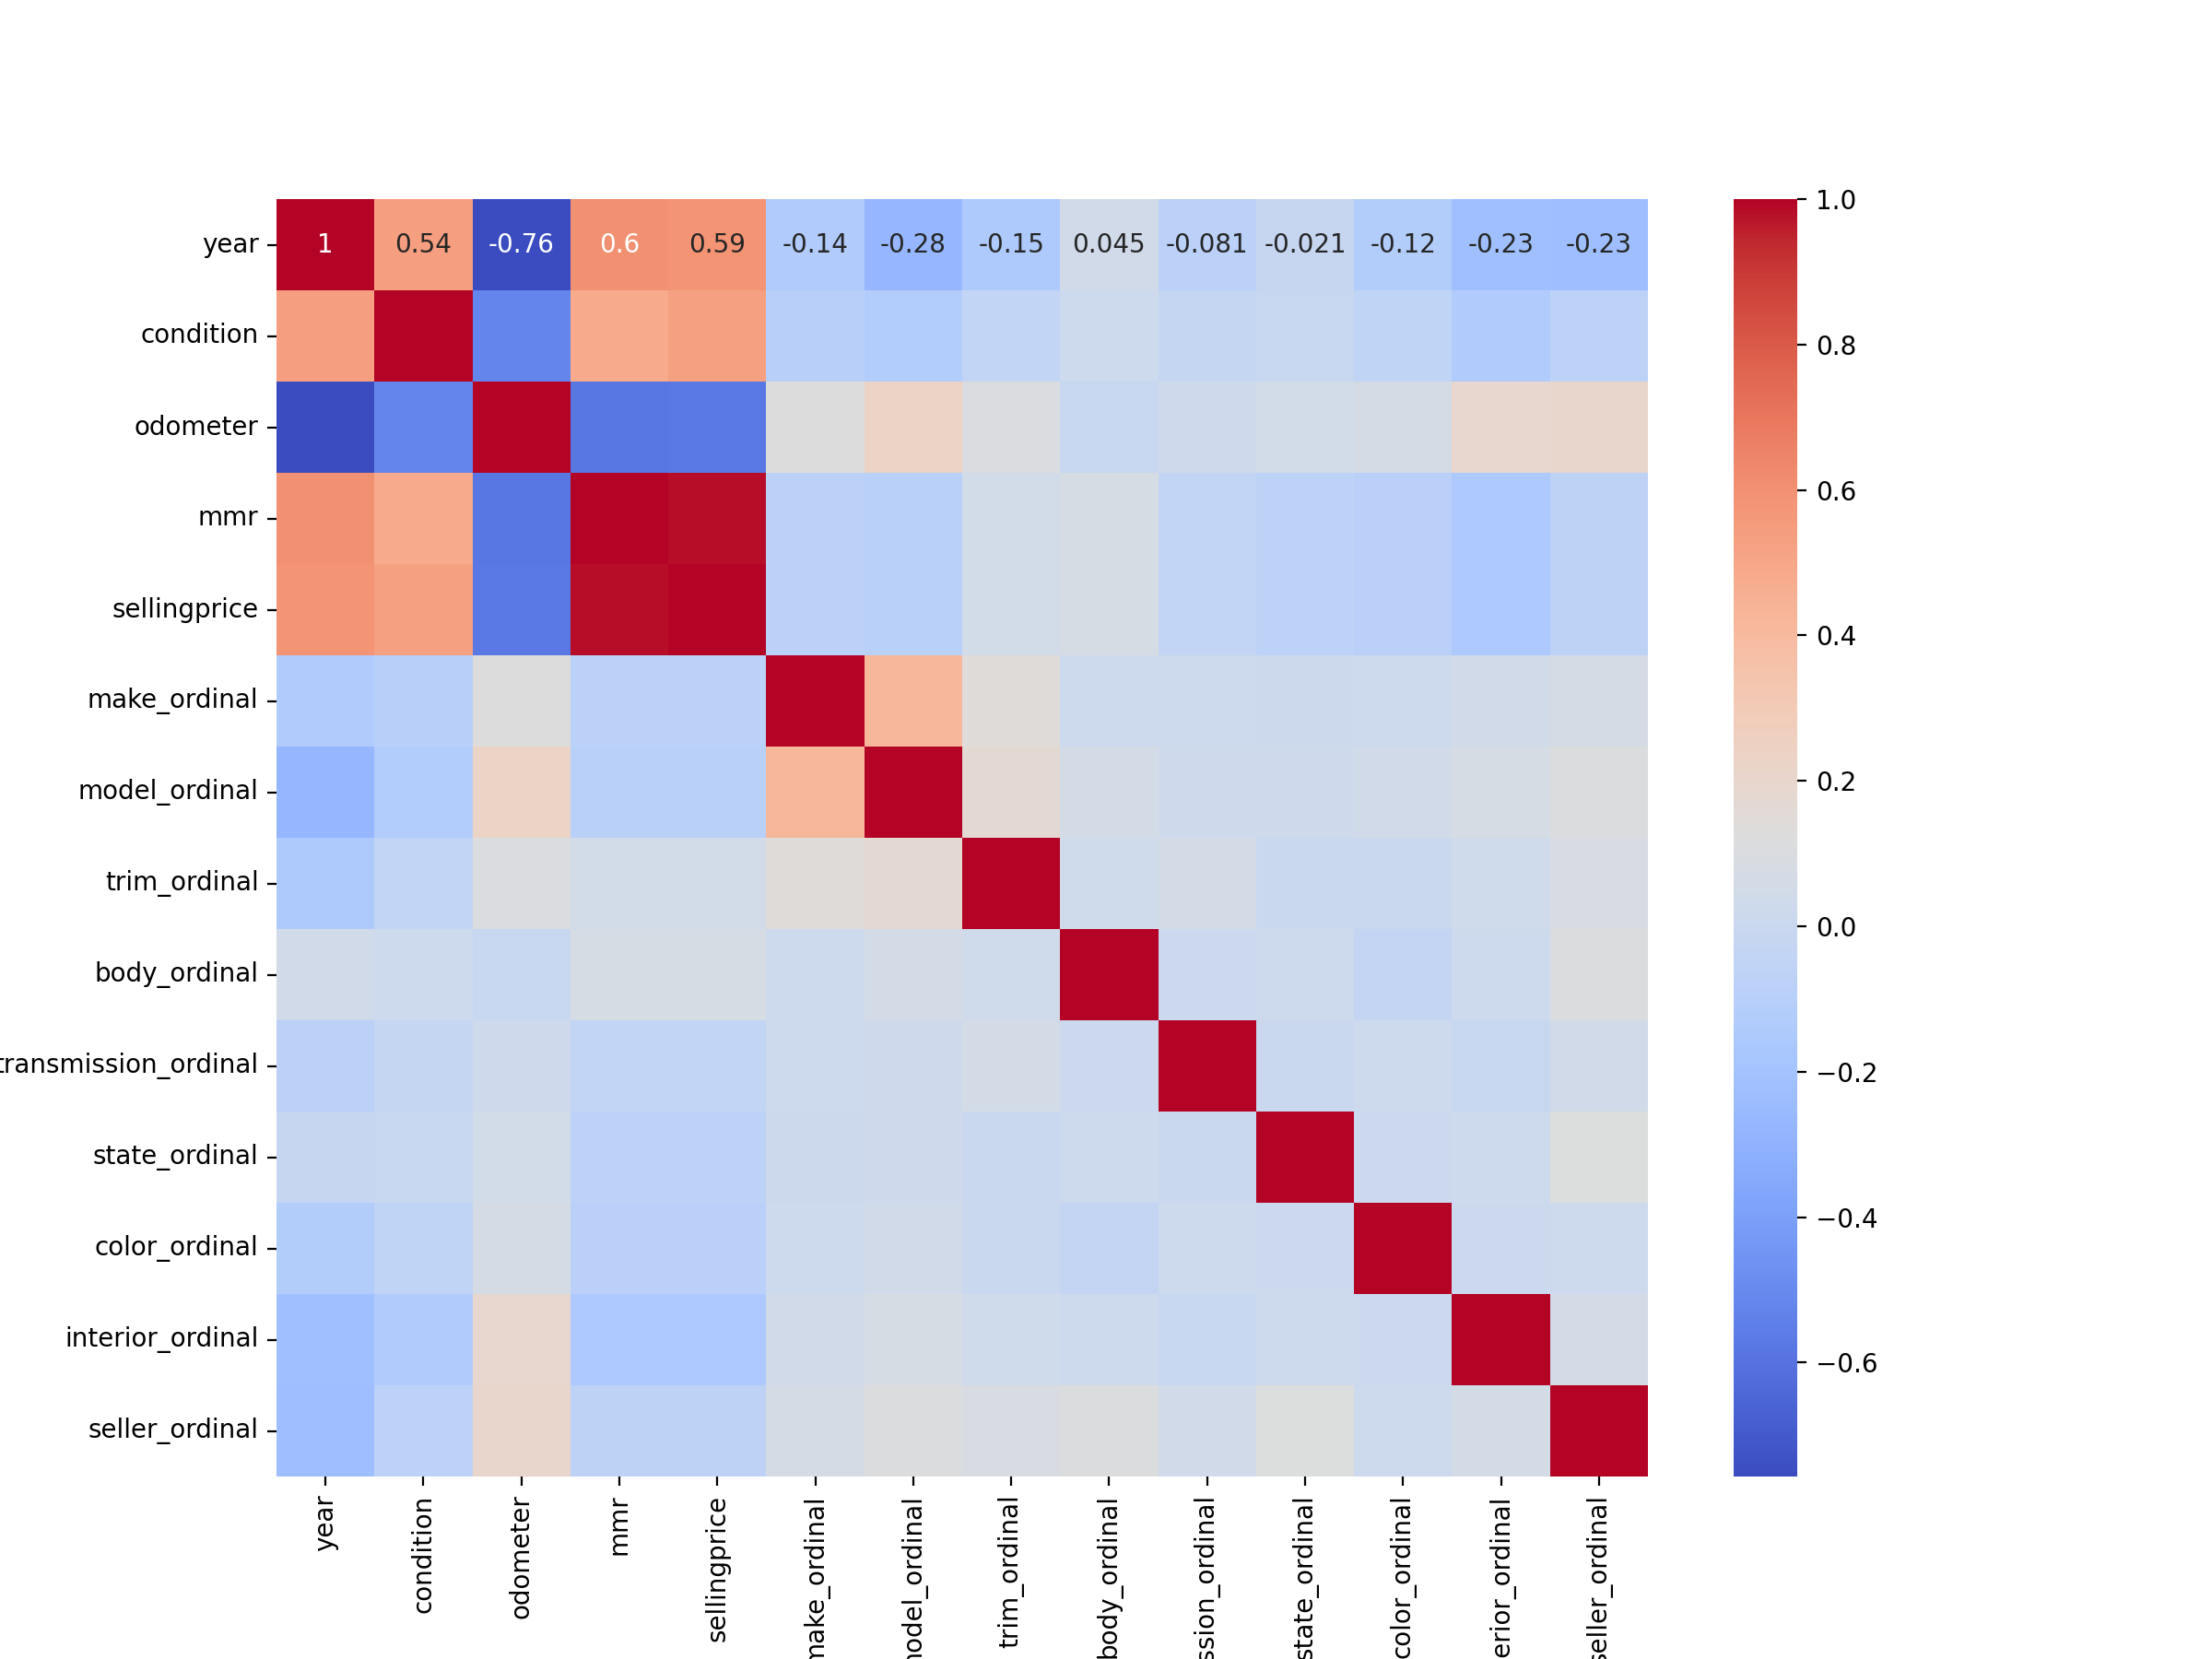

In [173]:
# Plotting heatmap
numerical_data=prices_df.select_dtypes(['int64','float64']).columns

correlationmatrix=prices_df[numerical_data].corr()
plt.figure(figsize=(12,9))
sns.heatmap(correlationmatrix,annot=True, cmap='coolwarm')